In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df=pd.read_csv("bank.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
#We can drop contact which looks irrelevant , 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign

df.drop(["day","month","contact"],axis =1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   duration   4521 non-null   int64 
 9   campaign   4521 non-null   int64 
 10  pdays      4521 non-null   int64 
 11  previous   4521 non-null   int64 
 12  poutcome   4521 non-null   object
 13  y          4521 non-null   object
dtypes: int64(6), object(8)
memory usage: 494.6+ KB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# replacing unknown with Null
for i in df.columns:
    df[i] = np.where(df[i] == "unknown", np.nan, df[i])
df.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [7]:
df.shape

(4521, 14)

In [8]:
#out of 4521 3705 rows are nulll , so we can drop poutcome column
df.drop("poutcome", inplace = True, axis = 1)

In [9]:
df.duplicated().sum()


0

In [10]:
# Find the mode of the 'job' column
mode_job = df['job'].mode()[0]
print(mode_job)
# Fill the NaN values of the 'job' column with the mode value
df['job'].fillna(mode_job, inplace=True)

management


In [11]:
# Find the mode of the 'education' column
mode_education = df['education'].mode()[0]
print(mode_education)
# Fill the NaN values of the 'education' column with the mode value
df['education'].fillna(mode_education, inplace=True)

secondary


In [12]:
#replacing yes with 1 and No with 0

l=['default','housing','loan','y']
def binary_map(q):
    return q.map({'yes':1,'no':0})
df[l]=df[l].apply(binary_map)

In [13]:
df.loan

0       0
1       1
2       0
3       1
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    1
Name: loan, Length: 4521, dtype: int64

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

# One Hot Encoding and dummies to convert string to numbers 

In [15]:
one = OneHotEncoder()
df[list(df["job"].unique())] = one.fit_transform(df[["job"]]).A
df.drop("job",axis = 1, inplace = True)
df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
e=pd.get_dummies(df['education'],drop_first=True)
e

,secondary,tertiary
0,0,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
4516,1,0
4517,0,1
4518,1,0
4519,1,0


In [17]:
m=pd.get_dummies(df['marital'],drop_first=True)
m

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
4516,1,0
4517,1,0
4518,1,0
4519,1,0


In [18]:
df=pd.concat([df,e,m],axis=1)

In [19]:
df.drop("marital",axis = 1, inplace = True)
df.drop("education",axis = 1, inplace = True)
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [20]:
#correlation between columns 

<AxesSubplot:>

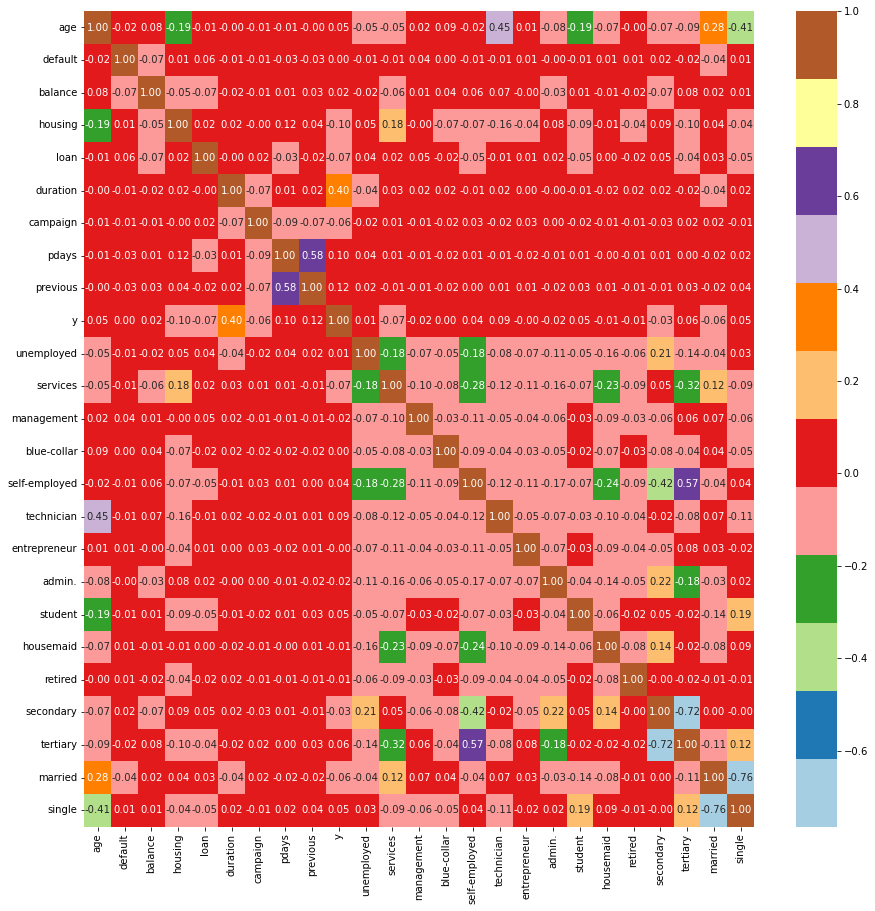

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f',annot_kws={'size': 10},cmap="Paired")


In [22]:
X=df.drop('y',axis=1)
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [23]:
y=df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

# Splitting data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts()

0    2810
1     354
Name: y, dtype: int64

In [25]:
# scaling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#balancing the dataset 

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

0    2810
1    2810
Name: y, dtype: int64

In [27]:
#finding Number of features to get best accuracy 
pca = PCA(n_components=13)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.11788987, 0.10561164, 0.07499073, 0.07016922, 0.06329319,
       0.05131867, 0.04689779, 0.04578121, 0.04512633, 0.04306068,
       0.04142576, 0.04022827, 0.03768932])

# Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [30]:
print('AUC-ROC:', roc_auc_score(y_test, y_pred))
print('*'*80)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('*'*80)
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC ROC: ", auc)

AUC-ROC: 0.7668972978412922
********************************************************************************
Confusion Matrix: [[963 227]
 [ 46 121]]
********************************************************************************
AUC ROC:  0.7668972978412922


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1190
           1       0.35      0.72      0.47       167

    accuracy                           0.80      1357
   macro avg       0.65      0.77      0.67      1357
weighted avg       0.88      0.80      0.83      1357



# Decision Tree

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [34]:
# Make predictions on the test set
y_pred = model_dt.predict(x_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('*'*80)
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print('*'*80)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC ROC: ", auc)

Accuracy: 0.8906077348066298
********************************************************************************
Confusion Matrix:
 [[770  36]
 [ 63  36]]
********************************************************************************
AUC ROC:  0.659485675614708


In [36]:
y_pred=model_dt.predict(x_test)


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       806
           1       0.50      0.36      0.42        99

    accuracy                           0.89       905
   macro avg       0.71      0.66      0.68       905
weighted avg       0.88      0.89      0.88       905



# Cross Validation


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model,x_train,y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 88.05% (1.99%)
